#  Web Scraping with Python

#### Imagine you have to pull a large amount of data from websites and you want to do it as quickly as possible. How would you do it without manually going to each website and getting the data? Well, “Web Scraping” is the answer. Web Scraping just makes this job easier and faster. 

## Why Web Scraping?

#### Web scraping is used to collect large information from websites.

## Applications of web scraping:

#### Price Comparison: Services such as ParseHub use web scraping to collect data from online shopping websites and use it to compare the prices of products.
#### Email address gathering: Many companies that use email as a medium for marketing, use web scraping to collect email ID and then send bulk emails.
#### Social Media Scraping: Web scraping is used to collect data from Social Media websites such as Twitter to find out what’s trending.
#### Research and Development: Web scraping is used to collect a large set of data (Statistics, General Information, Temperature, etc.) from websites, which are analyzed and used to carry out Surveys or for R&D.
#### Job listings: Details regarding job openings, interviews are collected from different websites and then listed in one place so that it is easily accessible to the user.

## What is Web Scraping? Is Web Scraping legal?

### Web scraping is an automated method used to extract large amounts of data from websites. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. There are different ways to scrape websites such as online Services, APIs or writing your own code. In this article, we’ll see how to implement web scraping with python. 

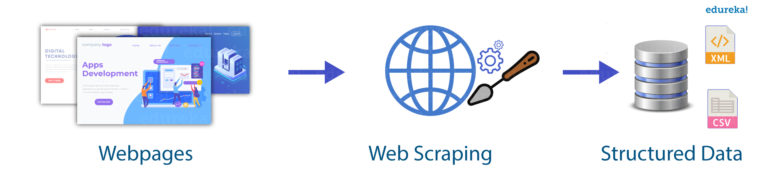

Talking about whether web scraping is legal or not, some websites allow web scraping and some don’t. To know whether a website allows web scraping or not, you can look at the website’s “robots.txt” file. You can find this file by appending “/robots.txt” to the URL that you want to scrape. For this example, I am scraping Flipkart website. So, to see the “robots.txt” file, the URL is www.flipkart.com/robots.txt.

# Why Python for Web Scraping?

### Ease of Use
### Large Collection or Libraries
### Dynamically typed
### Easily Understandable Syntax
### Small Code,Large task
### Community 

# How doees Web Scraping Work 

When you run the code for web scraping, a request is sent to the URL that you have mentioned. As a response to the request, the server sends the data and allows you to read the HTML or XML page. The code then, parses the HTML or XML page, finds the data and extracts it. 

## To extract data using web scraping with python, you need to follow these basic steps:

### Find the URL that you want to scrape
### Inspecting the Page
### Find the data you want to extract
### Write the code
### Run the code and extract the data
### Store the data in the required format 

# Case Study : Extracting Data from the Flipkart website using Python 

## Libraries used for Web scraping 

#### Selenium:  Selenium is a web testing library. It is used to automate browser activities.
#### BeautifulSoup: Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to extract the data easily.
#### Pandas: Pandas is a library used for data manipulation and analysis. It is used to extract the data and store it in the desired format. 

### Demo: Scraping Flipkart Website 

## Step1 : Find the URL that you want to scrape 
### URL : https://www.flipkart.com/laptops/~buyback-guarantee-on-laptops-/pr?sid=6bo%2Cb5g&uniqBStoreParam1=val1&wid=11.productCard.PMU_V2.

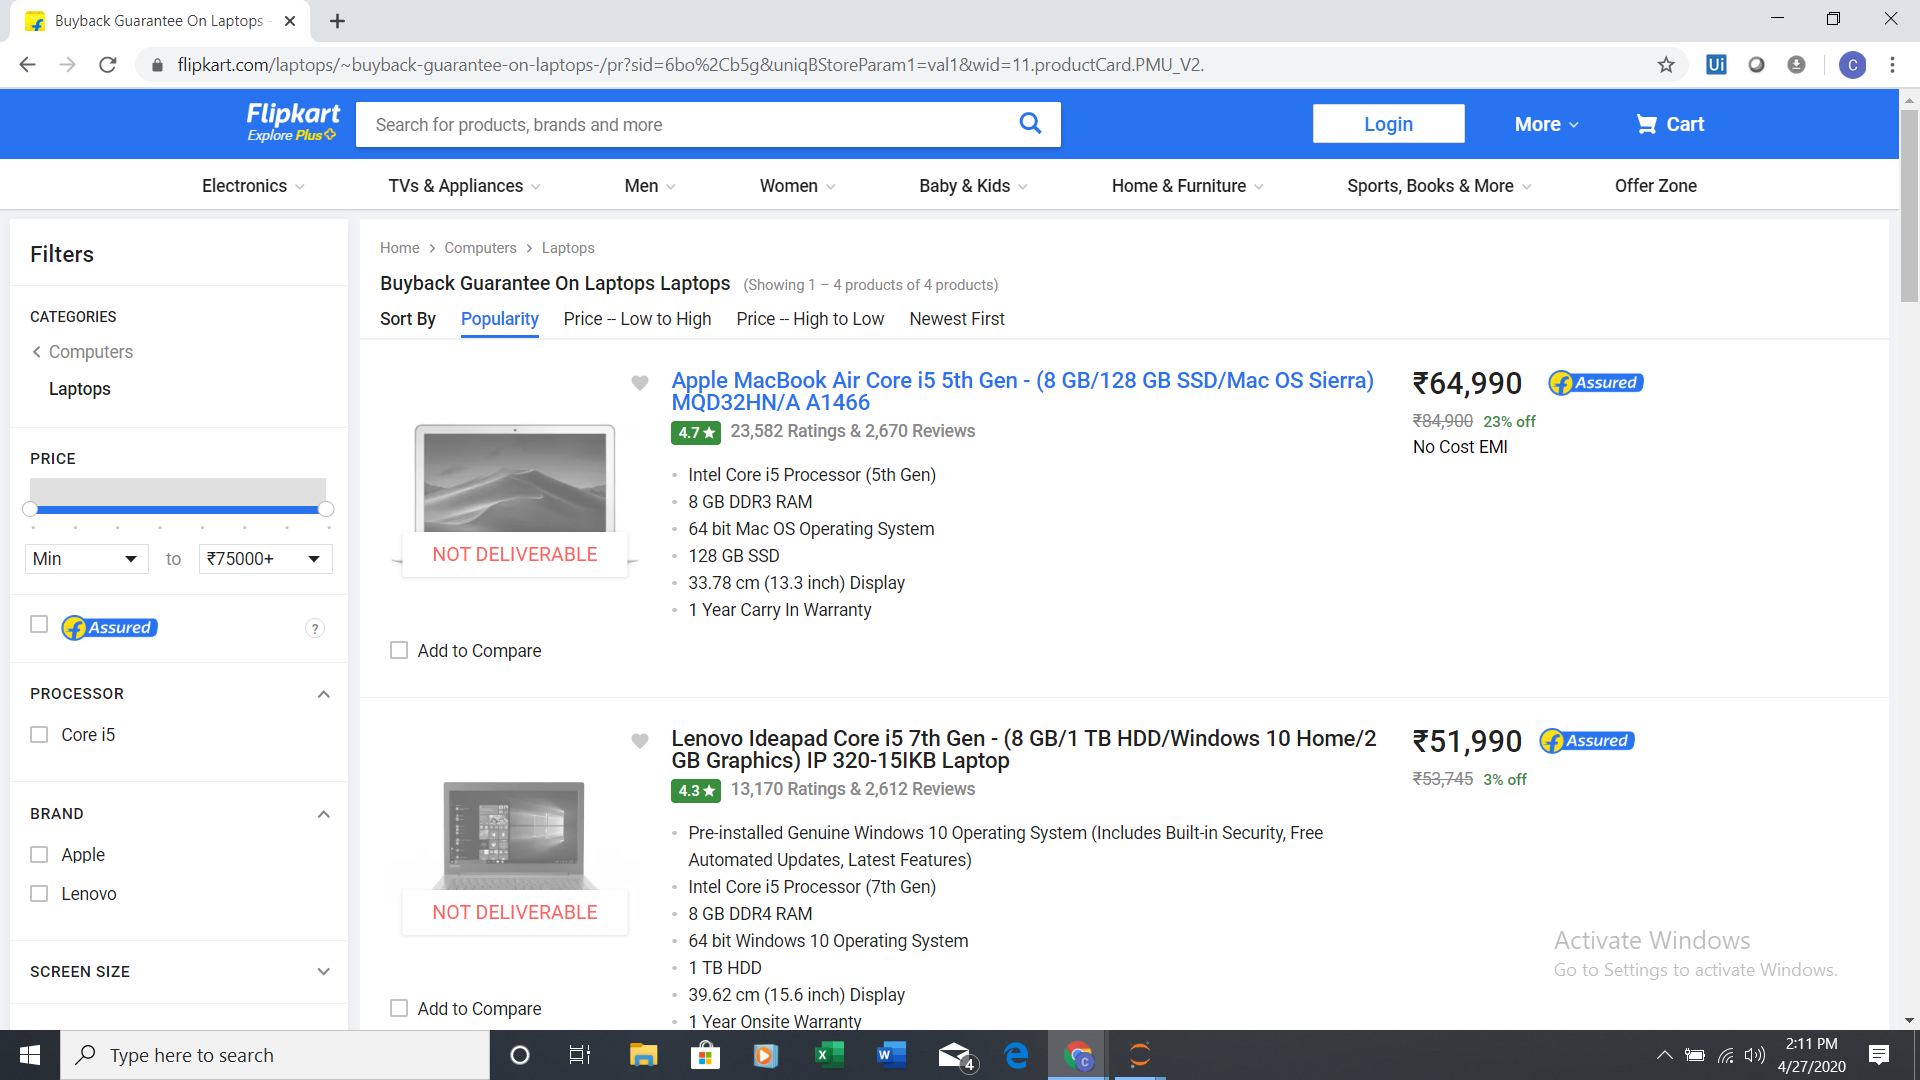

## Step 2: Inspecting the Page

#### The data is usually nested in tags. So, we inspect the page to see, under which tag the data we want to scrape is nested. To inspect the page, just right click on the element and click on “Inspect”.

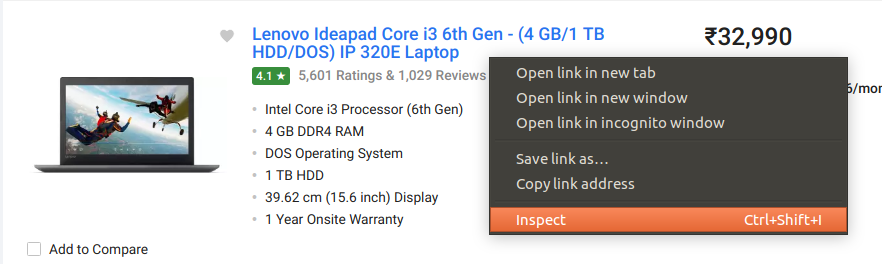

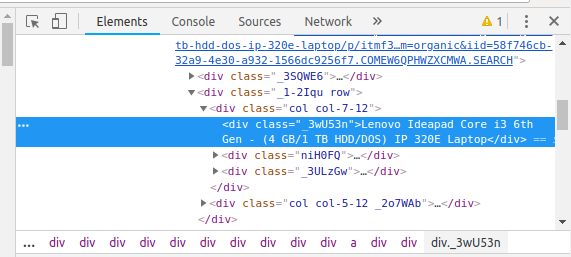

### When you click on the “Inspect” tab, you will see a “Browser Inspector Box” open.

## Step 3: Find the data you want to extract

#### Let's Extract the Price,Name and Rating which is nested in the "div" tag respectively.

## Step 4: Write the code

In [70]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [71]:
from selenium import webdriver
import time

In [72]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument("--test-type")
options.binary_location = "C:/Program Files (x86)/Google/Chrome/Application/chrome.exe"
driver = webdriver.Chrome(chrome_options=options)
driver.get('https://python.org')

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [79]:
from selenium import webdriver
 
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument("--test-type")
options.binary_location = "C:/Program Files (x86)/Google/Chrome/Application/chrome.exe"
driver = webdriver.Chrome(chrome_options=options)
 
#driver.get('https://www.flipkart.com/')
#for a in driver.find_elements_by_xpath('.//a'):
 #     print()
  #    #print(a.get_attribute('href'))

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [80]:
products=[] #List to store name of the product
prices=[] #List to store price of the product
ratings=[] #List to store rating of the product
driver.get("https://www.flipkart.com/laptops/~buyback-guarantee-on-laptops-/pr?sid=6bo%2Cb5g&uniqBStoreParam1=val1&wid=11.productCard.PMU_V2.")

In [81]:
content = driver.page_source
soup = BeautifulSoup(content)
for a in soup.findAll('a',href=True, attrs={'class':'_31qSD5'}):
    name=a.find('div', attrs={'class':'_3wU53n'})
    print(name.text)
    price=a.find('div', attrs={'class':'_1vC4OE _2rQ-NK'})
    print(price.text)
    rating=a.find('div', attrs={'class':'hGSR34'})
    print(rating.text)
    products.append(name.text)
    prices.append(price.text)
    ratings.append(rating.text) 

Apple MacBook Air Core i5 5th Gen - (8 GB/128 GB SSD/Mac OS Sierra) MQD32HN/A A1466
₹64,990
4.7
Lenovo Ideapad Core i5 7th Gen - (8 GB/1 TB HDD/Windows 10 Home/2 GB Graphics) IP 320-15IKB Laptop
₹51,990
4.3
Lenovo Core i5 7th Gen - (8 GB/2 TB HDD/Windows 10 Home/4 GB Graphics) IP 520 Laptop
₹79,500
4.4
Lenovo Core i5 7th Gen - (8 GB/1 TB HDD/DOS/2 GB Graphics) IP 320-15IKB Laptop
₹56,990
4.3


In [84]:
df = pd.DataFrame({'Product Name':products,'Price':prices,'Rating':ratings}) 
df.to_csv('products.csv', index=False, encoding='utf-8')